In [1]:
#Question 1

import json
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

en_countries = ['au','ca', 'gb', 'nz', 'us']
 
twit_id = 333903271
candy_id = 553834731
facebook_id = 284882215
tinder_id = 547702041
id_list = [twit_id, candy_id, facebook_id, tinder_id]

page_list = [1,2]

def app(id):
  df_total = pd.DataFrame(columns = ['im:version','im:rating', 'title', 'content'])
  for lang in en_countries:
    for page in page_list:
      data = requests.get(f"https://itunes.apple.com/{lang}/rss/customerreviews/id={id}/page={page}/sortby=mostrecent/json")
      d = json.loads(data.content)
      df = pd.DataFrame(d['feed']['entry'])
      df['title'] = df['title'].apply(lambda x: x['label'])
      df['im:version'] = df['im:version'].apply(lambda x: x['label'])
      df['im:rating'] = df['im:rating'].apply(lambda x: x['label'])
      df['content'] = df['content'].apply(lambda x: x['label'])
      df = df.drop(['author', 'id', 'link', 'im:voteSum', 'im:contentType', 'im:voteCount'], axis = 1)
      df_total = pd.concat([df_total, df], axis = 0)
  return df_total

twitter = app(twit_id)
candy = app(candy_id)
facebook = app(facebook_id)
tinder = app(tinder_id)

In [2]:
facebook

,im:version,im:rating,title,content
0,306.0,1,Facebook,Not happy with marketplace for it with I can g...
1,306.0,1,Bad Ethics and Morals.,I just hate the way FB judges you on very litt...
2,306.0,1,Censorship is rampant,Terrible platform. Might be more suitable to t...
3,306.0,1,Unfair rules,So sick of getting restricted and going to Fac...
4,306.0,1,Stole my photos,Facebook removed all my cover photos from my p...
...,...,...,...,...
45,306.0,1,.,No puedo entrar desde mi teléfono a mi cuenta ...
46,306.0,1,FACISTBOOK,Any platform that operates against our constit...
47,306.0,2,FACEBOOK DATING,So I had a Facebook dating profile and decided...
48,306.0,1,Lost me forever,"Want a place to connect with friends, and fami..."


In [3]:
tinder

,im:version,im:rating,title,content
0,12.2.0,1,It’s a money making scam,Well guess what.. I had no likes until my gold...
1,12.2.0,1,You can be banned and loose your subscription,I was banned... no explanation... no refund......
2,12.2.0,1,NOT WORTH A DOLLAR,I'm mad at myself for getting sucked in! \n\nD...
3,12.2.0,5,Tinderで出会って３年で結婚しました,たまたまappを使って知り合った彼と３年の交際をして結婚に至りました。\nありがとうございました。
4,12.2.0,1,Apple needs to investigate,Tinder is run by idiots.\nEven if you have a p...
...,...,...,...,...
45,12.2.0,4,Just give it time!,I’ve used this app for a little under a year a...
46,12.2.0,1,Glitchy,This app glitches way too much for being a pop...
47,12.2.0,1,Horrible,Number is banned for no reason I have never ma...
48,12.2.0,1,Followed all the rules and still got banned,So I open my tinder account to see that it has...


In [4]:
twitter

,im:version,im:rating,title,content
0,8.54.5,1,It’s too addictive,"You just get reinforcements from a bubble, it’..."
1,8.54.5,4,Boring without DT,Gone a bit boring without Twitter allowing the...
2,8.54.5,5,Want want this one is working right now,Why is not working
3,8.54,5,Women Love Tech,"Women love Tech, means ALL Women, North, South..."
4,8.54,5,Z,The other \nThe \nZac\nI don’t f \nZ. Cv z
...,...,...,...,...
45,8.54.5,5,MAGA,"Allow my President Trump to send tweets, we ha..."
46,8.54,1,Delist Twitter,Twitter unfairly suspends users without any du...
47,8.54.5,2,Reference post & Commentary,"Twitter you’re honestly weird ..,. To have not..."
48,8.54.5,4,Not easy to get followers,Twitter us overall ok.


In [5]:
candy

,im:version,im:rating,title,content
0,1.196.0.1,2,What the heck? No gold bars for episode races?,I enjoy Candy Crush - great stress reliever - ...
1,1.196.0.1,1,Rigged 😂,This games chances of winning are more up and ...
2,1.196.0.1,1,Lost all my boosters,I just lost all my boosters I was stock piling...
3,1.196.0.1,5,Mr,Amazing
4,1.196.0.1,5,I love this game,Yes
...,...,...,...,...
45,1.196.0.1,1,Cant play,Since it’s been updated it won’t let me play. ...
46,1.196.0.1,4,Help me,"In level 7972, how can I get 4 frogs? What is ..."
47,1.196.0.1,1,Not loading,Since the last update I can not go on and play...
48,1.196.0.1,3,Quick to grab your dough,Fun but expensive!


In [6]:
#Question 2

facebook['im:rating'] = facebook['im:rating'].astype(int)
facebook_version = facebook.groupby('im:version', as_index = False)['im:rating'].mean()
facebook_version.max()

im:version    306.0
im:rating      2.25
dtype: object

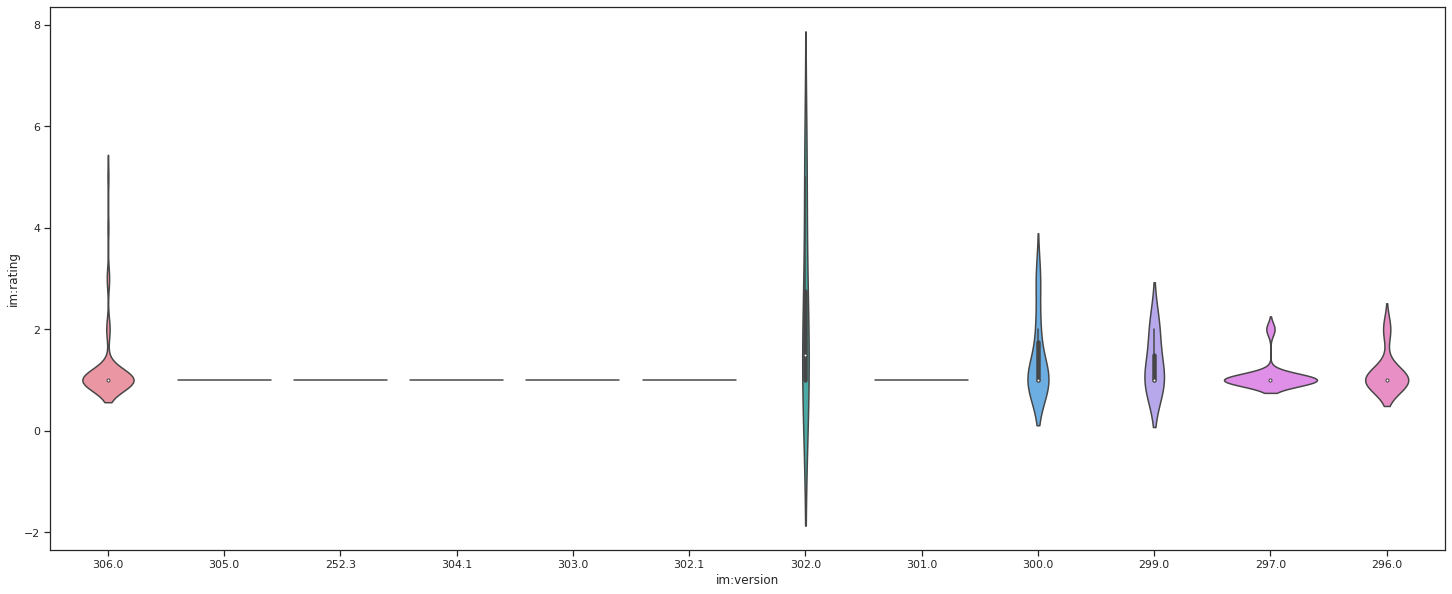

In [7]:
sns.set_theme(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.violinplot(x = 'im:version', y = 'im:rating', data = facebook)

In [8]:
tinder['im:rating'] = tinder['im:rating'].astype(int)
tinder_version = tinder.groupby('im:version', as_index = False)['im:rating'].mean()
tinder_version.max()

im:version     12.2.0
im:rating     2.33333
dtype: object

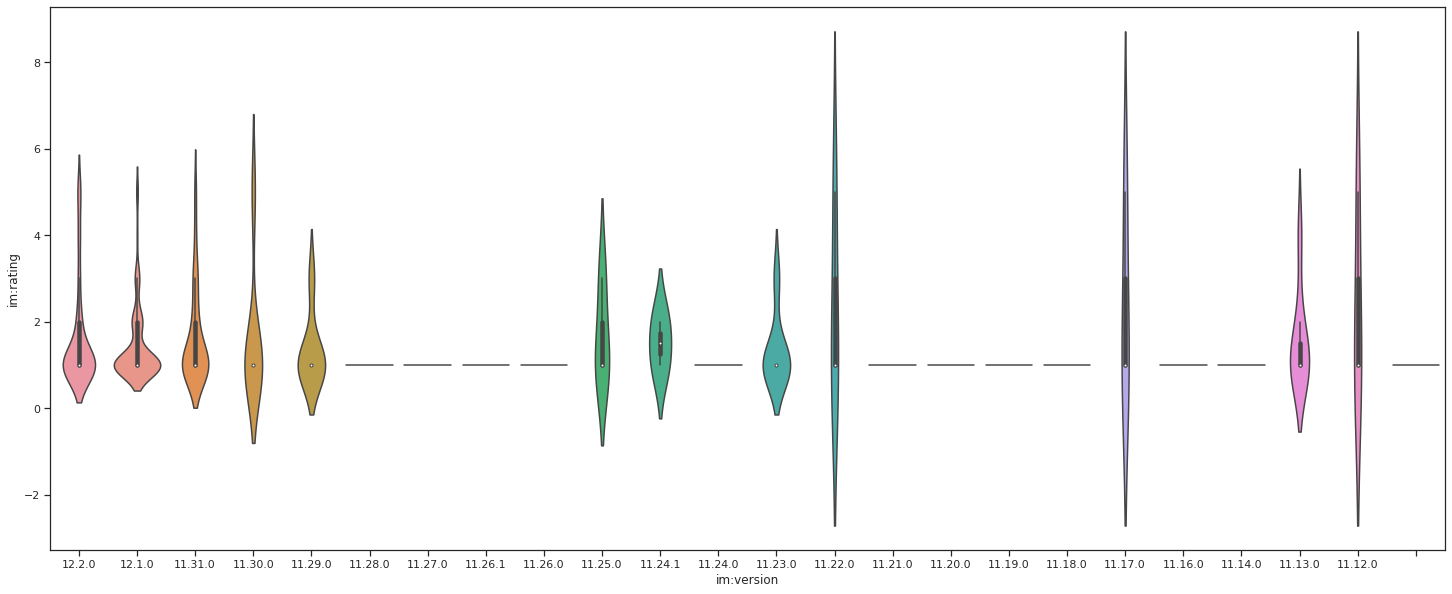

In [9]:
sns.set_theme(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.violinplot(x = 'im:version', y = 'im:rating', data = tinder)

In [10]:
twitter['im:rating'] = twitter['im:rating'].astype(int)
twitter_version = twitter.groupby('im:version', as_index = False)['im:rating'].mean()
twitter_version.max()

im:version    8.54.5
im:rating          5
dtype: object

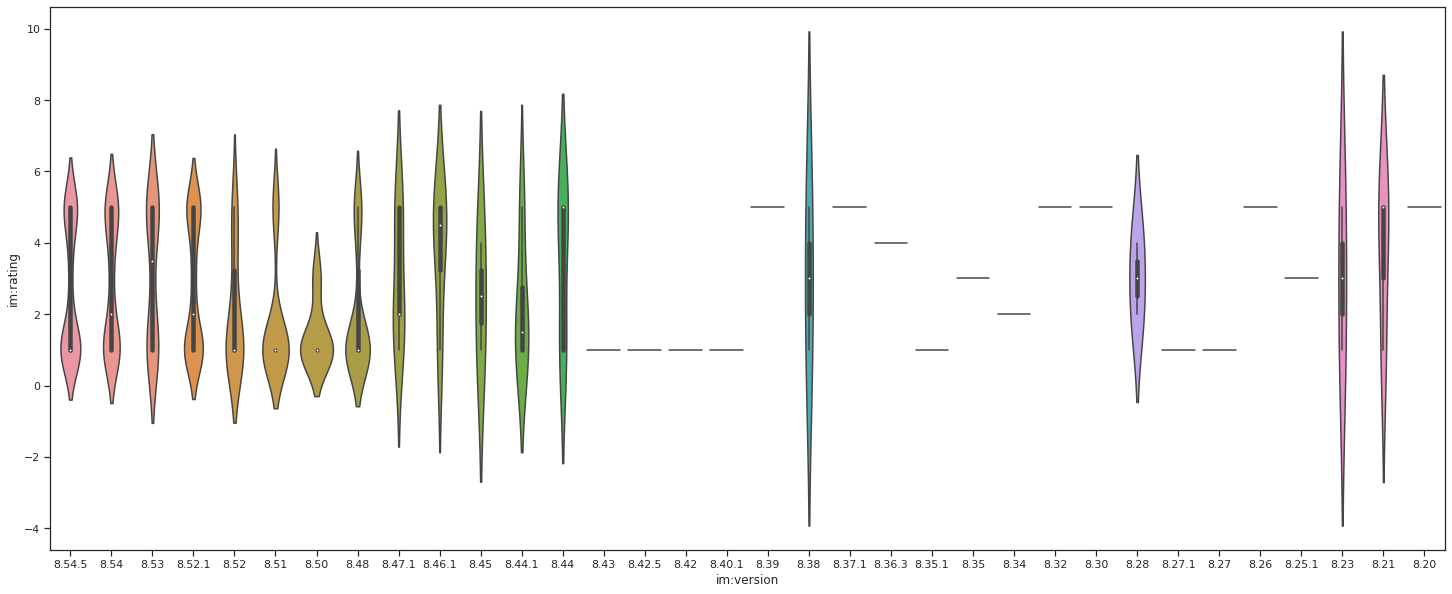

In [11]:
sns.set_theme(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.violinplot(x = 'im:version', y = 'im:rating', data = twitter)

In [12]:
candy['im:rating'] = candy['im:rating'].astype(int)
candy_version = candy.groupby('im:version', as_index = False)['im:rating'].mean()
candy_version.max()

im:version    1.196.0.1
im:rating             5
dtype: object

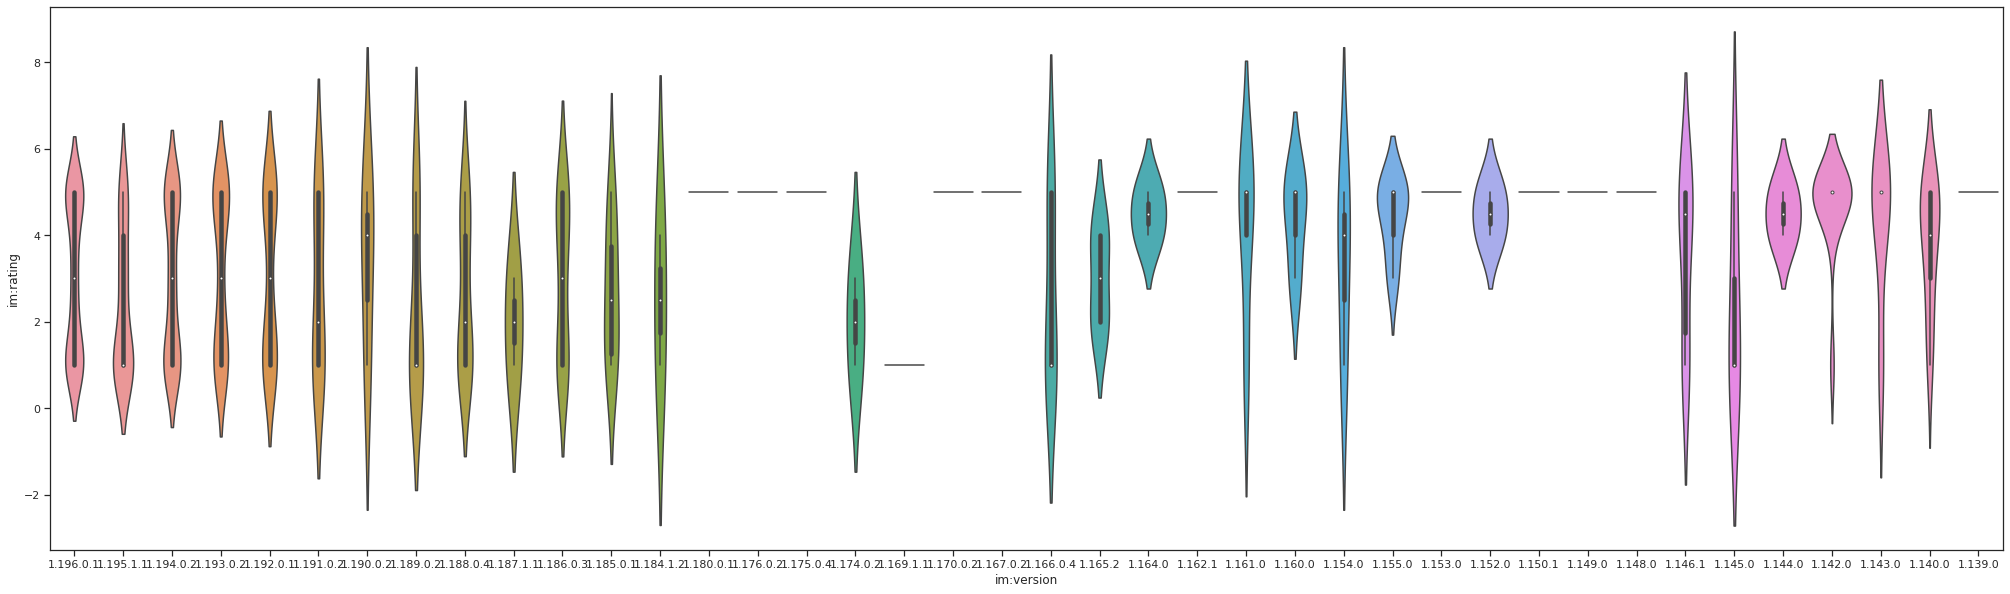

In [13]:
sns.set_theme(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(35, 10)
ax = sns.violinplot(x = 'im:version', y = 'im:rating', data = candy)

In [19]:
#Question 3, help from Pam

facebook_1 = facebook[facebook['im:rating'] == 1]
facebook_5 = facebook[facebook['im:rating'] == 5]
facebook_dummies_1 = facebook_1.title.str.get_dummies(' ')
facebook_dummies_5 = facebook_5.title.str.get_dummies(' ')
print('Facebook 1-star Rating: ', facebook_dummies_1.sum(axis = 0).sort_values(ascending = False)[0 : 1])
print('Facebook 5-star Rating: ', facebook_dummies_5.sum(axis = 0).sort_values(ascending = False)[0 : 1])

Facebook 1-star Rating:  Censorship    49
dtype: int64
Facebook 5-star Rating:  you    1
dtype: int64


In [15]:
tinder_1 = tinder[tinder['im:rating'] == 1]
tinder_5 = tinder[tinder['im:rating'] == 5]
tinder_dummies_1 = tinder_1.title.str.get_dummies(' ')
tinder_dummies_5 = tinder_5.title.str.get_dummies(' ')
print('Tinder 1-star Rating: ', tinder_dummies_1.sum(axis=0).sort_values(ascending=False)[0:1])
print('Tinder 5-star Rating: ', tinder_dummies_5.sum(axis=0).sort_values(ascending=False)[0:1])

Tinder 1-star Rating:  for    54
dtype: int64
Tinder 5-star Rating:  app    4
dtype: int64


In [16]:
twitter_1 = twitter[twitter['im:rating'] == 1]
twitter_5 = twitter[twitter['im:rating'] == 5]
twitter_dummies_1 = twitter_1.title.str.get_dummies(' ')
twitter_dummies_5 = twitter_5.title.str.get_dummies(' ')
print('Twitter 1-star Rating: ', twitter_dummies_1.sum(axis=0).sort_values(ascending=False)[0:1])
print('Twitter 5-star Rating: ', twitter_dummies_5.sum(axis=0).sort_values(ascending=False)[0:1])

Twitter 1-star Rating:  Twitter    28
dtype: int64
Twitter 5-star Rating:  Twitter    27
dtype: int64


In [17]:
candy_1 = candy[candy['im:rating'] == 1]
candy_5 = candy[candy['im:rating'] == 5]
candy_dummies_1 = candy_1.title.str.get_dummies(' ')
candy_dummies_5 = candy_5.title.str.get_dummies(' ')
print('Candy Crush 1-star Rating: ', candy_dummies_1.sum(axis=0).sort_values(ascending=False)[0:1])
print('Candy Crush 5-star Rating: ', candy_dummies_5.sum(axis=0).sort_values(ascending=False)[0:1])

Candy Crush 1-star Rating:  game    15
dtype: int64
Candy Crush 5-star Rating:  Candy    29
dtype: int64
